# Read in obs data
- so far this notebok reads in csv files of daily station data from 5 stations and stores it in a pandas dataframe
- the five stations are: Adelaide, Eversleigh, Sydney, Melbourne, Cape Otway 
- Then it saves Tmax, Tmin and Date from each station as a netcdf
- Then read the netcdfs for each station back in, select the dates they all run for (1878-1920) and save as one combined netcdf (called Daily_T_Aus_5S)
- I should make a map with the five station locations shown

In [6]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import xarray as xr
import os
import numpy as np

## Read in all 5 datasets

In [2]:
zf_Melb = zipfile.ZipFile('IDCJAC0010_086071_1800.zip') 
df_Melb = pd.read_csv(zf_Melb.open('IDCJAC0010_086071_1800_Data.csv'))
df_Melb

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,86071,1855,1,1,NaN,NaN,NaN
1,IDCJAC0010,86071,1855,1,2,NaN,NaN,NaN
2,IDCJAC0010,86071,1855,1,3,NaN,NaN,NaN
3,IDCJAC0010,86071,1855,1,4,NaN,NaN,NaN
4,IDCJAC0010,86071,1855,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58439,IDCJAC0010,86071,2015,1,1,27.3,1.0,Y
58440,IDCJAC0010,86071,2015,1,2,39.4,1.0,Y
58441,IDCJAC0010,86071,2015,1,3,38.4,1.0,Y
58442,IDCJAC0010,86071,2015,1,4,23.9,1.0,Y


In [3]:
zf_Melb_min = zipfile.ZipFile('IDCJAC0011_086071_1800.zip') 
df_Melb_min = pd.read_csv(zf_Melb_min.open('IDCJAC0011_086071_1800_Data.csv'))
df_Melb_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,86071,1855,1,1,NaN,NaN,NaN
1,IDCJAC0011,86071,1855,1,2,NaN,NaN,NaN
2,IDCJAC0011,86071,1855,1,3,NaN,NaN,NaN
3,IDCJAC0011,86071,1855,1,4,NaN,NaN,NaN
4,IDCJAC0011,86071,1855,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58440,IDCJAC0011,86071,2015,1,2,15.9,1.0,Y
58441,IDCJAC0011,86071,2015,1,3,20.8,1.0,Y
58442,IDCJAC0011,86071,2015,1,4,16.4,1.0,Y
58443,IDCJAC0011,86071,2015,1,5,15.6,1.0,Y


In [4]:
zf_COtway = zipfile.ZipFile('IDCJAC0010_090015_1800.zip') 
df_COtway = pd.read_csv(zf_COtway.open('IDCJAC0010_090015_1800_Data.csv'))
df_COtway

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,90015,1864,1,1,NaN,NaN,NaN
1,IDCJAC0010,90015,1864,1,2,NaN,NaN,NaN
2,IDCJAC0010,90015,1864,1,3,NaN,NaN,NaN
3,IDCJAC0010,90015,1864,1,4,NaN,NaN,NaN
4,IDCJAC0010,90015,1864,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57524,IDCJAC0010,90015,2021,6,30,16.8,1.0,N
57525,IDCJAC0010,90015,2021,7,1,15.2,1.0,N
57526,IDCJAC0010,90015,2021,7,2,15.1,1.0,N
57527,IDCJAC0010,90015,2021,7,3,11.1,1.0,N


In [5]:
zf_COtway_min = zipfile.ZipFile('IDCJAC0011_090015_1800.zip') 
df_COtway_min = pd.read_csv(zf_COtway_min.open('IDCJAC0011_090015_1800_Data.csv'))
df_COtway_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,90015,1864,1,1,NaN,NaN,NaN
1,IDCJAC0011,90015,1864,1,2,NaN,NaN,NaN
2,IDCJAC0011,90015,1864,1,3,NaN,NaN,NaN
3,IDCJAC0011,90015,1864,1,4,NaN,NaN,NaN
4,IDCJAC0011,90015,1864,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57525,IDCJAC0011,90015,2021,7,1,10.9,1.0,N
57526,IDCJAC0011,90015,2021,7,2,10.3,1.0,N
57527,IDCJAC0011,90015,2021,7,3,5.1,1.0,N
57528,IDCJAC0011,90015,2021,7,4,5.3,1.0,N


In [7]:
zf_Syd = zipfile.ZipFile('IDCJAC0010_066062_1800.zip') 
df_Syd = pd.read_csv(zf_Syd.open('IDCJAC0010_066062_1800_Data.csv'))
df_Syd

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y
...,...,...,...,...,...,...,...,...
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y


In [8]:
zf_Syd_min = zipfile.ZipFile('IDCJAC0011_066062_1800.zip') 
df_Syd_min = pd.read_csv(zf_Syd_min.open('IDCJAC0011_066062_1800_Data.csv'))
df_Syd_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,66062,1859,1,1,14.5,NaN,Y
1,IDCJAC0011,66062,1859,1,2,15.7,1.0,Y
2,IDCJAC0011,66062,1859,1,3,15.3,1.0,Y
3,IDCJAC0011,66062,1859,1,4,17.4,1.0,Y
4,IDCJAC0011,66062,1859,1,5,16.9,1.0,Y
...,...,...,...,...,...,...,...,...
59043,IDCJAC0011,66062,2020,8,27,6.8,1.0,Y
59044,IDCJAC0011,66062,2020,8,28,10.4,1.0,Y
59045,IDCJAC0011,66062,2020,8,29,7.9,1.0,Y
59046,IDCJAC0011,66062,2020,8,30,8.9,1.0,Y


In [9]:
# read csv file into pandas dataframe
df_Adel = pd.read_csv('homogenised_glaisher_data_220721.csv')
df_Adel['Date'] = pd.to_datetime(df_Adel['Date'])#, format='%Y%m%d')
df_Adel

,Date,Tmax,Tmin
0,1860-01-01,37.9,22.7
1,1860-01-02,37.8,14.2
2,1860-01-03,38.8,24.1
3,1860-01-04,41.2,25.2
4,1860-01-05,38.1,26.8
...,...,...,...
69392,2049-12-27,NaN,NaN
69393,2049-12-28,NaN,NaN
69394,2049-12-29,NaN,NaN
69395,2049-12-30,NaN,NaN


In [10]:
# read csv file into pandas dataframe
df_Eversleigh = pd.read_csv('Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv', delimiter=';')
# reman max and min temperature to Tmax and Tmin
df_Ever = df_Eversleigh.rename(columns = {"Minimum.Temp..C.": "Tmin", "Maximum.Temp..C.": "Tmax"})
# convert dates to datetime object
df_Ever['Date'] = pd.to_datetime(df_Ever['Date'])#, format='%Y%m%d')
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [11]:
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [13]:
# allows you to look at data file without reading it in as a pandas df so you can see any issues with the csv
with open('homogenised_glaisher_data_220721.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Date', 'Tmax', 'Tmin']
['1860-01-01', '37.9', '22.7']
['1860-01-02', '37.8', '14.2']
['1860-01-03', '38.8', '24.1']
['1860-01-04', '41.2', '25.2']
['1860-01-05', '38.1', '26.8']
['1860-01-06', '41', '25.2']
['1860-01-07', '29.6', '23.6']
['1860-01-08', '22.6', '17']
['1860-01-09', '24.2', '15.2']
['1860-01-10', '29', '15.2']
['1860-01-11', '37.2', '21.7']
['1860-01-12', '25.6', '17.6']
['1860-01-13', '26', '12.4']
['1860-01-14', '22.1', '14.8']
['1860-01-15', '27.6', '10.7']
['1860-01-16', '34.8', '13']
['1860-01-17', '40.4', '17']
['1860-01-18', '33.8', '17.2']
['1860-01-19', '38.8', '14.7']
['1860-01-20', '42.9', '24.4']
['1860-01-21', '44.7', '26.1']
['1860-01-22', '44.7', '26.4']
['1860-01-23', '31.8', '17.5']
['1860-01-24', '33.4', '17']
['1860-01-25', '24', '13.8']
['1860-01-26', '25', '13.9']
['1860-01-27', '27.5', '10.9']
['1860-01-28', '37.4', '20']
['1860-01-29', '33.9', '22']
['1860-01-30', '34.8', '11.1']
['1860-01-31', '30.7', '12.2']
['1860-02-01', '26.7', '14.5']
['186

['1864-09-13', '24.1', '10.3']
['1864-09-14', '19.9', '11.1']
['1864-09-15', '15.5', '8']
['1864-09-16', '18', '8.3']
['1864-09-17', '23.6', '5.6']
['1864-09-18', '29.1', '8.9']
['1864-09-19', '27.9', '10.3']
['1864-09-20', '26.4', '17']
['1864-09-21', '24.7', '12.3']
['1864-09-22', '21.1', '9.4']
['1864-09-23', '18', '11.7']
['1864-09-24', '20.9', '9.8']
['1864-09-25', '27.2', '11.3']
['1864-09-26', '18.8', '13.8']
['1864-09-27', '16.9', '10.4']
['1864-09-28', '22', '10.8']
['1864-09-29', '18.9', '11.9']
['1864-09-30', '17.3', '5.1']
['1864-10-01', '19.8', '5.8']
['1864-10-02', '25.1', '9.7']
['1864-10-03', '15.8', '13.7']
['1864-10-04', '15.6', '6.3']
['1864-10-05', '17.3', '9.1']
['1864-10-06', '17.4', '8.2']
['1864-10-07', '18.3', '7.2']
['1864-10-08', '24.9', '6.5']
['1864-10-09', '27.7', '10.1']
['1864-10-10', '26.1', '10.2']
['1864-10-11', '17.3', '13']
['1864-10-12', '17.3', '6.7']
['1864-10-13', '24.9', '6']
['1864-10-14', '26.6', '13']
['1864-10-15', '16', '12']
['1864-10-16'

['1869-08-27', '19.5', '6.2']
['1869-08-28', '23.2', '6.9']
['1869-08-29', '18', '13.6']
['1869-08-30', '13.8', '6.9']
['1869-08-31', '13.8', '2.8']
['1869-09-01', '14.4', '1.8']
['1869-09-02', '16.6', '3']
['1869-09-03', '17.9', '4.2']
['1869-09-04', '16.2', '8.3']
['1869-09-05', '17.2', '6']
['1869-09-06', '19.2', '5.3']
['1869-09-07', '15.1', '8.4']
['1869-09-08', '13.1', '3.5']
['1869-09-09', '14.4', '4.2']
['1869-09-10', '16.4', '3.7']
['1869-09-11', '21.5', '3.7']
['1869-09-12', '24', '6.7']
['1869-09-13', '24.6', '9.4']
['1869-09-14', '27.1', '9.4']
['1869-09-15', '28.1', '10.4']
['1869-09-16', '25.6', '14.2']
['1869-09-17', '19.1', '9']
['1869-09-18', '14.9', '7.8']
['1869-09-19', '16.7', '7.9']
['1869-09-20', '20.3', '7.2']
['1869-09-21', '19.7', '6.7']
['1869-09-22', '21.2', '3.8']
['1869-09-23', '24.1', '6.7']
['1869-09-24', '27.8', '12.7']
['1869-09-25', '26.1', '13.9']
['1869-09-26', '28.5', '9.3']
['1869-09-27', '23.1', '11.1']
['1869-09-28', '22.1', '17.2']
['1869-09-29'

['1874-10-24', '27.6', '17.2']
['1874-10-25', '17.4', '13.1']
['1874-10-26', '17.2', '9.6']
['1874-10-27', '20.1', '9.8']
['1874-10-28', '21', '7.5']
['1874-10-29', '26.7', '7.5']
['1874-10-30', '25.1', '10.3']
['1874-10-31', '19.9', '11.4']
['1874-11-01', '23.3', '12']
['1874-11-02', '21.2', '14.7']
['1874-11-03', '25.6', '15.4']
['1874-11-04', '31.7', '16.9']
['1874-11-05', '19.5', '11.9']
['1874-11-06', '19.6', '6.7']
['1874-11-07', '21.2', '8.4']
['1874-11-08', '20.5', '15']
['1874-11-09', '19.4', '8.8']
['1874-11-10', '23.9', '9.3']
['1874-11-11', '30.9', '11.8']
['1874-11-12', '24.9', '16.3']
['1874-11-13', '28.9', '9.7']
['1874-11-14', '18.3', '7.9']
['1874-11-15', '23.9', '7.7']
['1874-11-16', '25', '14.7']
['1874-11-17', '21.5', '12.4']
['1874-11-18', '20.8', '13.2']
['1874-11-19', '19.7', '13.2']
['1874-11-20', '30.6', '15.3']
['1874-11-21', '21', '18.3']
['1874-11-22', '19.7', '9.6']
['1874-11-23', '21.5', '8']
['1874-11-24', '22.1', '9.5']
['1874-11-25', '30', '14.7']
['187

['1879-09-18', '16.9', '11.3']
['1879-09-19', '18', '8']
['1879-09-20', '22.1', '4.8']
['1879-09-21', '19.8', '12.7']
['1879-09-22', '18', '11.9']
['1879-09-23', '15.5', '11.4']
['1879-09-24', '17.5', '5.8']
['1879-09-25', '20.7', '7.6']
['1879-09-26', '12.9', '6.8']
['1879-09-27', '15', '5.5']
['1879-09-28', '17.6', '7.9']
['1879-09-29', '17.6', '5.3']
['1879-09-30', '17.7', '5.5']
['1879-10-01', '17.7', '4.4']
['1879-10-02', '17.9', '5.3']
['1879-10-03', '23.6', '6.7']
['1879-10-04', '25.9', '11.8']
['1879-10-05', '27.4', '12']
['1879-10-06', '19.3', '13.1']
['1879-10-07', '15.7', '7']
['1879-10-08', '16.2', '4.3']
['1879-10-09', '17.5', '5.9']
['1879-10-10', '14.3', '10.1']
['1879-10-11', '15.3', '6.3']
['1879-10-12', '16.2', '3.1']
['1879-10-13', '22', '7.2']
['1879-10-14', '24.9', '12']
['1879-10-15', '27.9', '13.7']
['1879-10-16', '26.4', '15.8']
['1879-10-17', '15.7', '9.6']
['1879-10-18', '19.2', '10.6']
['1879-10-19', '20.1', '9.9']
['1879-10-20', '22.4', '9.8']
['1879-10-21',

['1885-01-07', '25.2', '10.9']
['1885-01-08', '31.5', '12.8']
['1885-01-09', '21', '12.2']
['1885-01-10', '25.3', '9.5']
['1885-01-11', '34.7', '13.2']
['1885-01-12', '30.8', '22.8']
['1885-01-13', '30', '13.9']
['1885-01-14', '30.8', '12.7']
['1885-01-15', '33.3', '15']
['1885-01-16', '36.3', '14']
['1885-01-17', '21.8', '13.4']
['1885-01-18', '25.4', '9.3']
['1885-01-19', '23.8', '12.6']
['1885-01-20', '23.9', '9.9']
['1885-01-21', '29.2', '13.6']
['1885-01-22', '32.4', '18.9']
['1885-01-23', '29.5', '15']
['1885-01-24', '27.1', '16.3']
['1885-01-25', '29.2', '13.8']
['1885-01-26', '23', '14.9']
['1885-01-27', '23.9', '11.1']
['1885-01-28', '30.8', '14.8']
['1885-01-29', '34.5', '14.7']
['1885-01-30', '33', '17']
['1885-01-31', '27.6', '14.3']
['1885-02-01', '26', '12']
['1885-02-02', '29.8', '13.1']
['1885-02-03', '38.2', '18.9']
['1885-02-04', '39.4', '26.1']
['1885-02-05', '37.4', '22.6']
['1885-02-06', '23.5', '21.5']
['1885-02-07', '19.1', '12.8']
['1885-02-08', '19.8', '10.6']


['1890-03-10', '31.2', '21.9']
['1890-03-11', '26.5', '15.8']
['1890-03-12', '27.6', '13.4']
['1890-03-13', '27.9', '14.7']
['1890-03-14', '34.9', '15']
['1890-03-15', '36.2', '23.5']
['1890-03-16', '28.6', '22.2']
['1890-03-17', '22.1', '16']
['1890-03-18', '21.1', '11.4']
['1890-03-19', '21.6', '12.5']
['1890-03-20', '22.3', '10.2']
['1890-03-21', '24.1', '11.3']
['1890-03-22', '24.3', '11.7']
['1890-03-23', '23.5', '12.3']
['1890-03-24', '26.7', '13.4']
['1890-03-25', '26.3', '13.5']
['1890-03-26', '20', '13.1']
['1890-03-27', '21.7', '13.1']
['1890-03-28', '22.6', '9.3']
['1890-03-29', '23.8', '13.2']
['1890-03-30', '26.6', '14.2']
['1890-03-31', '24.7', '12.3']
['1890-04-01', '23.3', '9.9']
['1890-04-02', '23.9', '11.4']
['1890-04-03', '22.5', '13.8']
['1890-04-04', '25.6', '9.6']
['1890-04-05', '29.6', '17.2']
['1890-04-06', '29.6', '15.5']
['1890-04-07', '27.5', '19.1']
['1890-04-08', '21.2', '20.9']
['1890-04-09', '21', '16.2']
['1890-04-10', '20.1', '7.9']
['1890-04-11', '18.9

['1895-01-15', '22.2', '14.3']
['1895-01-16', '27.4', '11']
['1895-01-17', '21.9', '16.1']
['1895-01-18', '28.8', '16.1']
['1895-01-19', '32.1', '15.4']
['1895-01-20', '31.6', '18.7']
['1895-01-21', '34.4', '22.8']
['1895-01-22', '33.3', '22']
['1895-01-23', '35.2', '23.4']
['1895-01-24', '37.9', '24.4']
['1895-01-25', '22', '14.3']
['1895-01-26', '22.6', '12.4']
['1895-01-27', '22.6', '11.7']
['1895-01-28', '25.9', '14']
['1895-01-29', '25.5', '14.3']
['1895-01-30', '31.5', '13.9']
['1895-01-31', '35.3', '16.3']
['1895-02-01', '34.7', '23.9']
['1895-02-02', '37.1', '22.8']
['1895-02-03', '38.8', '23.6']
['1895-02-04', '26', '18.3']
['1895-02-05', '25.8', '14.5']
['1895-02-06', '26', '15.9']
['1895-02-07', '28.9', '13.4']
['1895-02-08', '30.4', '12.2']
['1895-02-09', '28.2', '11.8']
['1895-02-10', '31.4', '13.2']
['1895-02-11', '37.3', '21.5']
['1895-02-12', '40.3', '26.6']
['1895-02-13', '40.3', '27.3']
['1895-02-14', '39.1', '26.7']
['1895-02-15', '38.3', '26.7']
['1895-02-16', '37.8

['1899-07-23', '17.1', '2']
['1899-07-24', '16.7', '1.4']
['1899-07-25', '15', '2.9']
['1899-07-26', '14.8', '2.2']
['1899-07-27', '16.5', '0.7']
['1899-07-28', '18', '1.4']
['1899-07-29', '20', '9.1']
['1899-07-30', '14.4', '9.3']
['1899-07-31', '15.1', '1.9']
['1899-08-01', '13.4', '3.8']
['1899-08-02', '15.6', '2']
['1899-08-03', '18.8', '4.5']
['1899-08-04', '15', '8.5']
['1899-08-05', '14.3', '9.1']
['1899-08-06', '16.1', '6.6']
['1899-08-07', '12', '4']
['1899-08-08', '12.8', '4.4']
['1899-08-09', '14.1', '8.4']
['1899-08-10', '15', '4.6']
['1899-08-11', '15.4', '3.7']
['1899-08-12', '17.4', '3.3']
['1899-08-13', '19', '9.8']
['1899-08-14', '18.1', '10.3']
['1899-08-15', '16.7', '3.8']
['1899-08-16', '16.9', '6']
['1899-08-17', '19', '10.8']
['1899-08-18', '16.5', '9.5']
['1899-08-19', '17.1', '7.5']
['1899-08-20', '15.9', '8.5']
['1899-08-21', '15.6', '8.7']
['1899-08-22', '16.1', '3.3']
['1899-08-23', '15', '9']
['1899-08-24', '14.4', '5.5']
['1899-08-25', '13.1', '3.7']
['1899

['12/14/1904', '27.8', '20.6']
['12/15/1904', '22.2', '10.5']
['12/16/1904', '24.6', '11.6']
['12/17/1904', '25.9', '16']
['12/18/1904', '24.1', '13.7']
['12/19/1904', '23.3', '8.4']
['12/20/1904', '24.8', '12.2']
['12/21/1904', '24.6', '11.5']
['12/22/1904', '34.6', '13']
['12/23/1904', '36.5', '17.6']
['12/24/1904', '28.2', '22.2']
['12/25/1904', '24.2', '15']
['12/26/1904', '24.2', '14.3']
['12/27/1904', '26.7', '15.9']
['12/28/1904', '38.5', '13.7']
['12/29/1904', '36.6', '15.8']
['12/30/1904', '41.2', '19']
['12/31/1904', '44.9', '24']
['1/1/1905', '38.2', '22.4']
['1/2/1905', '18.2', '16.9']
['1/3/1905', '22.8', '13.9']
['1/4/1905', '21.9', '12.4']
['1/5/1905', '24.5', '11.3']
['1/6/1905', '26.6', '13.1']
['1/7/1905', '33.9', '15']
['1/8/1905', '38.5', '20.1']
['1/9/1905', '34.8', '20.1']
['1/10/1905', '41.1', '21.6']
['1/11/1905', '42.4', '25.4']
['1/12/1905', '42.5', '23.4']
['1/13/1905', '41.5', '28.4']
['1/14/1905', '28.7', '23.6']
['1/15/1905', '25.6', '14.9']
['1/16/1905', 

['10/14/1909', '26.5', '12.6']
['10/15/1909', '29.6', '13.5']
['10/16/1909', '19.1', '18.2']
['10/17/1909', '18.3', '12.7']
['10/18/1909', '19.7', '5.6']
['10/19/1909', '20.3', '9.6']
['10/20/1909', '20.1', '5.7']
['10/21/1909', '22.3', '6.6']
['10/22/1909', '28.5', '14.2']
['10/23/1909', '31.7', '16.2']
['10/24/1909', '21', '13.9']
['10/25/1909', '19.7', '9.4']
['10/26/1909', '21.5', '6.5']
['10/27/1909', '27.8', '14']
['10/28/1909', '20.6', '11.4']
['10/29/1909', '17.9', '9.4']
['10/30/1909', '15.3', '8.7']
['10/31/1909', '17.3', '8.9']
['11/1/1909', '17.9', '8.1']
['11/2/1909', '18.5', '4.7']
['11/3/1909', '27.5', '9.1']
['11/4/1909', '31', '16.5']
['11/5/1909', '28.1', '11.2']
['11/6/1909', '37.2', '12.7']
['11/7/1909', '38.3', '23.7']
['11/8/1909', '27.9', '24']
['11/9/1909', '20.4', '13.8']
['11/10/1909', '19.5', '11.8']
['11/11/1909', '22.1', '10.8']
['11/12/1909', '18.7', '7.6']
['11/13/1909', '18.7', '12.7']
['11/14/1909', '18.7', '12.6']
['11/15/1909', '21.9', '12.7']
['11/16

['4/8/1915', '23.3', '17.4']
['4/9/1915', '18.8', '15.9']
['4/10/1915', '16', '10.6']
['4/11/1915', '17.9', '6.1']
['4/12/1915', '18.7', '14.5']
['4/13/1915', '19.5', '13.4']
['4/14/1915', '21.9', '13.4']
['4/15/1915', '27.6', '16.2']
['4/16/1915', '30.2', '19.9']
['4/17/1915', '20.6', '17.9']
['4/18/1915', '22.7', '14.2']
['4/19/1915', '19.7', '15.6']
['4/20/1915', '19.2', '10']
['4/21/1915', '22.4', '6.7']
['4/22/1915', '23', '8.9']
['4/23/1915', '20.7', '8.5']
['4/24/1915', '18.5', '6.7']
['4/25/1915', '19.8', '5.6']
['4/26/1915', '20.2', '5.2']
['4/27/1915', '18.2', '5.6']
['4/28/1915', '15.8', '8.3']
['4/29/1915', '20.6', '6.1']
['4/30/1915', '22', '8.4']
['5/1/1915', '27.2', '15.4']
['5/2/1915', '19.2', '13.5']
['5/3/1915', '17.1', '10.5']
['5/4/1915', '17.7', '4.6']
['5/5/1915', '19.4', '5.7']
['5/6/1915', '22.2', '6.6']
['5/7/1915', '22.8', '8.8']
['5/8/1915', '24.4', '7.8']
['5/9/1915', '16.2', '15.4']
['5/10/1915', '17.9', '6.7']
['5/11/1915', '19.6', '6.7']
['5/12/1915', '16

['3/24/1920', '23.2', '11.1']
['3/25/1920', '27.1', '11.2']
['3/26/1920', '24.3', '12']
['3/27/1920', '26.4', '12.2']
['3/28/1920', '31.8', '18.7']
['3/29/1920', '33.6', '23.5']
['3/30/1920', '34.7', '26.4']
['3/31/1920', '32.9', '22.5']
['4/1/1920', '34.2', '23.6']
['4/2/1920', '22.8', '16.8']
['4/3/1920', '21.5', '11.7']
['4/4/1920', '21', '7']
['4/5/1920', '19.7', '8.3']
['4/6/1920', '20.4', '10.1']
['4/7/1920', '21.5', '9']
['4/8/1920', '27.6', '10.2']
['4/9/1920', '31.3', '19.1']
['4/10/1920', '26.9', '19.1']
['4/11/1920', '21.2', '15.6']
['4/12/1920', '20.6', '14.2']
['4/13/1920', '19.7', '9']
['4/14/1920', '18.8', '10.1']
['4/15/1920', '19.7', '7']
['4/16/1920', '21.2', '12.9']
['4/17/1920', '17.9', '5.7']
['4/18/1920', '17.9', '5.8']
['4/19/1920', '20.7', '5.7']
['4/20/1920', '21.6', '7.9']
['4/21/1920', '24.3', '8.8']
['4/22/1920', '22.3', '9']
['4/23/1920', '17.9', '12.7']
['4/24/1920', '18.1', '8.8']
['4/25/1920', '18.1', '6.2']
['4/26/1920', '18.1', '6.3']
['4/27/1920', '21

['6/5/1925', '16.2', '9.8']
['6/6/1925', '16', '6.3']
['6/7/1925', '18.2', '12']
['6/8/1925', '19', '7.8']
['6/9/1925', '18', '5.4']
['6/10/1925', '18.2', '6.1']
['6/11/1925', '16', '9']
['6/12/1925', '19.8', '4.4']
['6/13/1925', '18.9', '7.8']
['6/14/1925', '20.4', '4.8']
['6/15/1925', '20.9', '8.2']
['6/16/1925', '19.4', '5.1']
['6/17/1925', '17.4', '2.6']
['6/18/1925', '12.1', '0.8']
['6/19/1925', '14.8', '0.4']
['6/20/1925', '15.1', '1']
['6/21/1925', '16.2', '8.1']
['6/22/1925', '15.7', '8']
['6/23/1925', '16.2', '8']
['6/24/1925', '16.9', '11']
['6/25/1925', '15.8', '5.8']
['6/26/1925', '15', '4.9']
['6/27/1925', '15.3', '9']
['6/28/1925', '18.6', '6.3']
['6/29/1925', '19.3', '9.8']
['6/30/1925', '15', '12.2']
['7/1/1925', '18', '10.1']
['7/2/1925', '15.1', '8.5']
['7/3/1925', '13.9', '8.2']
['7/4/1925', '14.5', '5.7']
['7/5/1925', '13', '8.8']
['7/6/1925', '14.3', '8.5']
['7/7/1925', '14.7', '3.5']
['7/8/1925', '13.7', '3.5']
['7/9/1925', '19.8', '5.7']
['7/10/1925', '14', '6.8'

['2/12/1931', '38.4', '21.2']
['2/13/1931', '22.1', '15.5']
['2/14/1931', '22.1', '11.7']
['2/15/1931', '28.1', '12.3']
['2/16/1931', '34.3', '13.8']
['2/17/1931', '37.8', '16.3']
['2/18/1931', '33', '17.4']
['2/19/1931', '22.6', '16.1']
['2/20/1931', '20.7', '13.3']
['2/21/1931', '20.6', '11.7']
['2/22/1931', '23.7', '13.4']
['2/23/1931', '29.5', '11.1']
['2/24/1931', '34.9', '19.6']
['2/25/1931', '37.8', '19.6']
['2/26/1931', '22.8', '15.4']
['2/27/1931', '22.2', '14.6']
['2/28/1931', '24.2', '12.5']
['3/1/1931', '23.2', '12.5']
['3/2/1931', '23.5', '11.3']
['3/3/1931', '21.8', '14.2']
['3/4/1931', '24.6', '16.4']
['3/5/1931', '25.7', '12.2']
['3/6/1931', '25.8', '14.2']
['3/7/1931', '32.5', '13.7']
['3/8/1931', '25.1', '16.2']
['3/9/1931', '26.3', '13.4']
['3/10/1931', '27.2', '13.7']
['3/11/1931', '33.6', '21.6']
['3/12/1931', '36.9', '23.9']
['3/13/1931', '19.6', '14.1']
['3/14/1931', '21.1', '12.6']
['3/15/1931', '21.8', '10.9']
['3/16/1931', '23.3', '12.4']
['3/17/1931', '24.9',

['12/13/1936', '23.3', '13.7']
['12/14/1936', '22.8', '14.1']
['12/15/1936', '30.9', '15']
['12/16/1936', '29.4', '18.7']
['12/17/1936', '30.4', '16.8']
['12/18/1936', '31.9', '20.2']
['12/19/1936', '33.4', '20.6']
['12/20/1936', '26.7', '18.4']
['12/21/1936', '23', '15.2']
['12/22/1936', '23.7', '15']
['12/23/1936', '21.5', '12']
['12/24/1936', '20.5', '11.2']
['12/25/1936', '24.8', '11.2']
['12/26/1936', '29.9', '12']
['12/27/1936', '31.9', '20.5']
['12/28/1936', '35.1', '21.2']
['12/29/1936', '33.4', '21.9']
['12/30/1936', '35.8', '21.3']
['12/31/1936', '22.7', '18.1']
['1/1/1937', '22.3', '14.5']
['1/2/1937', '21.5', '14.3']
['1/3/1937', '20.9', '13.6']
['1/4/1937', '22.3', '12.7']
['1/5/1937', '22.2', '11.5']
['1/6/1937', '28.5', '12.2']
['1/7/1937', '34.6', '19']
['1/8/1937', '19.2', '16.7']
['1/9/1937', '21.9', '12.3']
['1/10/1937', '25.8', '12.7']
['1/11/1937', '28.8', '16.6']
['1/12/1937', '29.4', '14.6']
['1/13/1937', '34.7', '16.8']
['1/14/1937', '27', '16.6']
['1/15/1937', 

['12/21/1940', '22.7', '15.2']
['12/22/1940', '22.7', '14.4']
['12/23/1940', '20.1', '12.2']
['12/24/1940', '32.3', '11.9']
['12/25/1940', '24.1', '18.1']
['12/26/1940', '31.3', '13.7']
['12/27/1940', '23.1', '20.6']
['12/28/1940', '20.3', '14.9']
['12/29/1940', '24.8', '9.8']
['12/30/1940', '26.7', '17.6']
['12/31/1940', '23', '12.2']
['1/1/1941', '21.4', '12.8']
['1/2/1941', '24.7', '11.7']
['1/3/1941', '22.2', '14.9']
['1/4/1941', '20.1', '11']
['1/5/1941', '22.2', '10.6']
['1/6/1941', '25.7', '12']
['1/7/1941', '24', '12.7']
['1/8/1941', '25.7', '13']
['1/9/1941', '25.4', '14.2']
['1/10/1941', '26.7', '12.7']
['1/11/1941', '34.2', '17']
['1/12/1941', '34.9', '22.7']
['1/13/1941', '34.2', '19.4']
['1/14/1941', '30.1', '18.2']
['1/15/1941', '23.7', '18.7']
['1/16/1941', '21.7', '14.6']
['1/17/1941', '22.4', '13.6']
['1/18/1941', '26.3', '12.5']
['1/19/1941', '28.7', '14.5']
['1/20/1941', '31', '14.3']
['1/21/1941', '36.9', '21.6']
['1/22/1941', '37.8', '25.4']
['1/23/1941', '33.7', '

['4/10/1946', '17.2', '5.4']
['4/11/1946', '18.8', '10.2']
['4/12/1946', '18.1', '10.5']
['4/13/1946', '17.6', '9.1']
['4/14/1946', '17.2', '10.3']
['4/15/1946', '17.3', '3.4']
['4/16/1946', '20.7', '4.5']
['4/17/1946', '20.2', '6.2']
['4/18/1946', '18.1', '5.6']
['4/19/1946', '19.4', '11.7']
['4/20/1946', '22.4', '10.5']
['4/21/1946', '25.4', '15.5']
['4/22/1946', '17.6', '10.2']
['4/23/1946', '19.4', '8.3']
['4/24/1946', '19.3', '13.1']
['4/25/1946', '18.2', '8.2']
['4/26/1946', '20.7', '4.6']
['4/27/1946', '18.2', '13.3']
['4/28/1946', '18.1', '5.6']
['4/29/1946', '17.9', '10.5']
['4/30/1946', '19.4', '6.2']
['5/1/1946', '21.1', '6.7']
['5/2/1946', '22.2', '11.5']
['5/3/1946', '21', '11.9']
['5/4/1946', '19.9', '12.7']
['5/5/1946', '19.6', '9.8']
['5/6/1946', '20.2', '14.7']
['5/7/1946', '25', '11.9']
['5/8/1946', '24.5', '13.7']
['5/9/1946', '24.8', '14']
['5/10/1946', '27.3', '15.1']
['5/11/1946', '21.5', '16.9']
['5/12/1946', '16.4', '12.8']
['5/13/1946', '17.1', '8.8']
['5/14/19

['4/16/1951', '20.5', '13']
['4/17/1951', '22', '11.2']
['4/18/1951', '20.9', '14.1']
['4/19/1951', '18.8', '11.2']
['4/20/1951', '18.5', '13.6']
['4/21/1951', '17.2', '12.8']
['4/22/1951', '17.4', '9.1']
['4/23/1951', '21', '13']
['4/24/1951', '19.7', '13.6']
['4/25/1951', '16.3', '12.9']
['4/26/1951', '15.7', '10.5']
['4/27/1951', '16.1', '10.1']
['4/28/1951', '19.5', '6.7']
['4/29/1951', '21', '8.6']
['4/30/1951', '19.7', '10.2']
['5/1/1951', '21.3', '13.8']
['5/2/1951', '21.5', '10.7']
['5/3/1951', '24.8', '16.7']
['5/4/1951', '25.4', '16.1']
['5/5/1951', '22.1', '16.5']
['5/6/1951', '20.5', '14.2']
['5/7/1951', '16.6', '6.8']
['5/8/1951', '16.8', '11.1']
['5/9/1951', '15.6', '9']
['5/10/1951', '17.6', '10.5']
['5/11/1951', '18.3', '11.5']
['5/12/1951', '18.2', '9']
['5/13/1951', '13', '8.6']
['5/14/1951', '16.4', '12.7']
['5/15/1951', '15.9', '10.9']
['5/16/1951', '17.1', '11.9']
['5/17/1951', '16.1', '11.2']
['5/18/1951', '18.8', '8.8']
['5/19/1951', '18.1', '11.5']
['5/20/1951',

['6/5/1956', '15.6', '8.7']
['6/6/1956', '10.7', '5.1']
['6/7/1956', '12.7', '2.9']
['6/8/1956', '14.9', '6']
['6/9/1956', '15.6', '3.9']
['6/10/1956', '13.8', '7.2']
['6/11/1956', '15.9', '11']
['6/12/1956', '15.8', '8.6']
['6/13/1956', '17.4', '8.8']
['6/14/1956', '16.6', '11.1']
['6/15/1956', '15.6', '8.8']
['6/16/1956', '13.8', '9']
['6/17/1956', '13.6', '7.2']
['6/18/1956', '13.4', '5.2']
['6/19/1956', '12.9', '6.2']
['6/20/1956', '11.8', '4.8']
['6/21/1956', '12.7', '8.7']
['6/22/1956', '14.6', '4.6']
['6/23/1956', '14.9', '1.6']
['6/24/1956', '13.1', '2.2']
['6/25/1956', '14.9', '5.2']
['6/26/1956', '11.6', '6.2']
['6/27/1956', '11', '5.9']
['6/28/1956', '12.9', '5.4']
['6/29/1956', '13.6', '9']
['6/30/1956', '13.4', '9.2']
['7/1/1956', '13.6', '8.3']
['7/2/1956', '14.5', '10.1']
['7/3/1956', '15.5', '10.7']
['7/4/1956', '16', '9.2']
['7/5/1956', '17.4', '9.8']
['7/6/1956', '16', '8.4']
['7/7/1956', '14.5', '7.8']
['7/8/1956', '14.1', '8']
['7/9/1956', '13.7', '6.3']
['7/10/1956

['7/8/1961', '12.7', '8.3']
['7/9/1961', '14.1', '7.8']
['7/10/1961', '15.1', '6.4']
['7/11/1961', '15.6', '3.3']
['7/12/1961', '15.1', '5.3']
['7/13/1961', '11.4', '7.4']
['7/14/1961', '14.2', '9.2']
['7/15/1961', '14.1', '7']
['7/16/1961', '14.1', '5.7']
['7/17/1961', '13.6', '6.8']
['7/18/1961', '13', '4']
['7/19/1961', '15.2', '2.8']
['7/20/1961', '14.5', '2.7']
['7/21/1961', '14.2', '1.6']
['7/22/1961', '13.1', '2.9']
['7/23/1961', '13.7', '7']
['7/24/1961', '16.5', '7.3']
['7/25/1961', '15.6', '6.8']
['7/26/1961', '13.9', '6.4']
['7/27/1961', '13.5', '6.8']
['7/28/1961', '14.3', '3.5']
['7/29/1961', '14.4', '8.5']
['7/30/1961', '15.6', '8.3']
['7/31/1961', '15.1', '7']
['8/1/1961', '15.5', '8.4']
['8/2/1961', '14.8', '8.2']
['8/3/1961', '13.4', '4']
['8/4/1961', '12.2', '5.3']
['8/5/1961', '14.4', '1.9']
['8/6/1961', '16.3', '5.6']
['8/7/1961', '17.8', '3.4']
['8/8/1961', '21', '8.5']
['8/9/1961', '15.5', '6.3']
['8/10/1961', '15.8', '9.4']
['8/11/1961', '15.1', '4.3']
['8/12/196

['7/3/1966', '13.9', '7.4']
['7/4/1966', '13.7', '8.3']
['7/5/1966', '13.1', '9']
['7/6/1966', '14.2', '9.4']
['7/7/1966', '14.1', '9.8']
['7/8/1966', '13.6', '9.7']
['7/9/1966', '14.3', '4.1']
['7/10/1966', '13.9', '5.5']
['7/11/1966', '14.4', '3.4']
['7/12/1966', '14.6', '6.1']
['7/13/1966', '13.6', '8.5']
['7/14/1966', '11.7', '2.9']
['7/15/1966', '11.7', '3.7']
['7/16/1966', '10', '1.6']
['7/17/1966', '13.5', '3.5']
['7/18/1966', '14.3', '4']
['7/19/1966', '9.8', '5.6']
['7/20/1966', '15.3', '5.3']
['7/21/1966', '16.5', '5.1']
['7/22/1966', '16.5', '8.5']
['7/23/1966', '17.9', '9']
['7/24/1966', '12.7', '10.3']
['7/25/1966', '13.1', '4']
['7/26/1966', '12.7', '8.2']
['7/27/1966', '12.1', '3.5']
['7/28/1966', '13.7', '3.5']
['7/29/1966', '13.7', '3.5']
['7/30/1966', '13', '4.5']
['7/31/1966', '15.6', '2.7']
['8/1/1966', '16.7', '5.3']
['8/2/1966', '14.7', '6.5']
['8/3/1966', '12.8', '4.9']
['8/4/1966', '14.6', '5.8']
['8/5/1966', '13.3', '8.3']
['8/6/1966', '12.8', '3.9']
['8/7/1966

['1/17/1972', '23.7', '16.3']
['1/18/1972', '23.9', '14.1']
['1/19/1972', '24', '12.9']
['1/20/1972', '30.1', '14.4']
['1/21/1972', '25.6', '16.6']
['1/22/1972', '22', '14.6']
['1/23/1972', '21.4', '14.7']
['1/24/1972', '25.8', '13.2']
['1/25/1972', '30.8', '14.6']
['1/26/1972', '33.4', '18.9']
['1/27/1972', '33.1', '20.3']
['1/28/1972', '32.9', '19.7']
['1/29/1972', '34.8', '19.6']
['1/30/1972', '34.2', '19.6']
['1/31/1972', '33.9', '18.9']
['2/1/1972', '35.1', '19.9']
['2/2/1972', '31.6', '21.4']
['2/3/1972', '23.7', '14.7']
['2/4/1972', '26', '13.8']
['2/5/1972', '30.2', '14.7']
['2/6/1972', '35.3', '19.6']
['2/7/1972', '35.3', '20']
['2/8/1972', '35.8', '22.1']
['2/9/1972', '37.2', '24.9']
['2/10/1972', '37.2', '26.3']
['2/11/1972', '36.6', '25.7']
['2/12/1972', '34.2', '25.2']
['2/13/1972', '21.5', '14.5']
['2/14/1972', '19.8', '12.8']
['2/15/1972', '23.6', '13']
['2/16/1972', '24.4', '14.8']
['2/17/1972', '23.6', '15']
['2/18/1972', '23.1', '15.5']
['2/19/1972', '22.5', '11.8']
[

['7/27/1977', '13.7', '9.9']
['7/28/1977', '13.3', '8.6']
['7/29/1977', '12.2', '7.6']
['7/30/1977', '16.3', '2.4']
['7/31/1977', '16.8', '8.8']
['8/1/1977', '15.3', '8.5']
['8/2/1977', '18', '9.5']
['8/3/1977', '14.3', '9.2']
['8/4/1977', '15.9', '8']
['8/5/1977', '15.3', '7.5']
['8/6/1977', '15.5', '9.2']
['8/7/1977', '15.4', '5.5']
['8/8/1977', '21.1', '5.2']
['8/9/1977', '24.5', '10.2']
['8/10/1977', '25', '13.5']
['8/11/1977', '19.2', '16.3']
['8/12/1977', '13.3', '10.1']
['8/13/1977', '15.3', '4.5']
['8/14/1977', '17.3', '4.1']
['8/15/1977', '19.6', '4.7']
['8/16/1977', '18.9', '4.6']
['8/17/1977', '21.3', '7.1']
['8/18/1977', '18.8', '10.2']
['8/19/1977', '25', '12.5']
['8/20/1977', '16.9', '14.2']
['8/21/1977', '16.6', '9.5']
['8/22/1977', '18.4', '9.8']
['8/23/1977', '23.5', '10.2']
['8/24/1977', '27', '9.9']
['8/25/1977', '28.4', '14.7']
['8/26/1977', '23.5', '14.6']
['8/27/1977', '22.4', '10.6']
['8/28/1977', '27.3', '11.5']
['8/29/1977', '22', '9.2']
['8/30/1977', '13.4', '

['10/17/1982', '19.5', '7.1']
['10/18/1982', '27.6', '8.2']
['10/19/1982', '16.4', '11.8']
['10/20/1982', '16.4', '10.9']
['10/21/1982', '16.2', '11.2']
['10/22/1982', '18.3', '9.3']
['10/23/1982', '24.4', '7.9']
['10/24/1982', '29.8', '15.5']
['10/25/1982', '33.9', '18.8']
['10/26/1982', '19.9', '17.2']
['10/27/1982', '19.4', '13.3']
['10/28/1982', '24.1', '9.4']
['10/29/1982', '30.2', '9']
['10/30/1982', '16.2', '12.5']
['10/31/1982', '17.3', '8.5']
['11/1/1982', '20.1', '7.7']
['11/2/1982', '27.5', '9']
['11/3/1982', '31.2', '12.6']
['11/4/1982', '34.1', '18']
['11/5/1982', '36', '15.3']
['11/6/1982', '31.1', '24.8']
['11/7/1982', '22', '14.6']
['11/8/1982', '21.7', '10']
['11/9/1982', '20.3', '11.2']
['11/10/1982', '20.1', '14.5']
['11/11/1982', '25.3', '12.9']
['11/12/1982', '29', '15.6']
['11/13/1982', '33.2', '15.2']
['11/14/1982', '31.1', '18.8']
['11/15/1982', '26.7', '18.2']
['11/16/1982', '18.8', '13']
['11/17/1982', '20.4', '12.6']
['11/18/1982', '19.9', '12.4']
['11/19/198

['3/19/1987', '21.7', '11.7']
['3/20/1987', '20.4', '13']
['3/21/1987', '19.2', '14.3']
['3/22/1987', '24.7', '14.8']
['3/23/1987', '24.4', '11.6']
['3/24/1987', '24.5', '12.7']
['3/25/1987', '27.9', '10.2']
['3/26/1987', '29.2', '11']
['3/27/1987', '30.7', '18.8']
['3/28/1987', '21.4', '15']
['3/29/1987', '18.7', '13.4']
['3/30/1987', '18.6', '12.6']
['3/31/1987', '19.3', '12.7']
['4/1/1987', '23.9', '15.2']
['4/2/1987', '26.4', '12.2']
['4/3/1987', '28.9', '12.6']
['4/4/1987', '33', '14.6']
['4/5/1987', '32.2', '24.7']
['4/6/1987', '21', '14.7']
['4/7/1987', '20.4', '15.4']
['4/8/1987', '21.2', '14.8']
['4/9/1987', '22.6', '8.7']
['4/10/1987', '28.9', '13']
['4/11/1987', '30.5', '13.6']
['4/12/1987', '26.6', '19.6']
['4/13/1987', '19.3', '15.7']
['4/14/1987', '21.1', '10.7']
['4/15/1987', '21', '10.7']
['4/16/1987', '20.5', '12']
['4/17/1987', '22', '10.7']
['4/18/1987', '24.9', '6.6']
['4/19/1987', '18.4', '10.5']
['4/20/1987', '18', '8.1']
['4/21/1987', '19.5', '7.1']
['4/22/1987',

['4/15/1992', '22.6', '16.7']
['4/16/1992', '20.9', '10.2']
['4/17/1992', '23.3', '10.9']
['4/18/1992', '23.6', '14.5']
['4/19/1992', '27.9', '18.3']
['4/20/1992', '18.7', '14.6']
['4/21/1992', '17.3', '10.3']
['4/22/1992', '16.7', '6.2']
['4/23/1992', '19.2', '7']
['4/24/1992', '20.3', '6.2']
['4/25/1992', '19', '6.4']
['4/26/1992', '19.3', '10.3']
['4/27/1992', '17.1', '10.6']
['4/28/1992', '18.2', '7.9']
['4/29/1992', '19.8', '6.7']
['4/30/1992', '22.3', '8.3']
['5/1/1992', '19.4', '11.9']
['5/2/1992', '20.3', '12.1']
['5/3/1992', '21.6', '14']
['5/4/1992', '25.7', '11.6']
['5/5/1992', '26.5', '16.5']
['5/6/1992', '23.9', '16.2']
['5/7/1992', '22.7', '18.1']
['5/8/1992', '19.2', '15']
['5/9/1992', '19.3', '7.5']
['5/10/1992', '19.2', '10.4']
['5/11/1992', '18.8', '13.2']
['5/12/1992', '16.8', '11.1']
['5/13/1992', '17.4', '9.6']
['5/14/1992', '15.8', '10.9']
['5/15/1992', '15.5', '6.7']
['5/16/1992', '14.9', '4.6']
['5/17/1992', '15.5', '3.6']
['5/18/1992', '15.6', '4.9']
['5/19/199

['5/16/1997', '18.1', '5.9']
['5/17/1997', '17.2', '5.4']
['5/18/1997', '17.7', '9.1']
['5/19/1997', '17.7', '5.2']
['5/20/1997', '19.3', '10.6']
['5/21/1997', '17.6', '12.7']
['5/22/1997', '21', '13.4']
['5/23/1997', '19.5', '10.8']
['5/24/1997', '18.8', '7.9']
['5/25/1997', '20.1', '9.2']
['5/26/1997', '18.7', '14.6']
['5/27/1997', '18.5', '11.6']
['5/28/1997', '15.8', '10.5']
['5/29/1997', '15.1', '10.7']
['5/30/1997', '15.2', '4.8']
['5/31/1997', '16.8', '3.8']
['6/1/1997', '15.7', '8.7']
['6/2/1997', '14.5', '9.5']
['6/3/1997', '17.2', '9.1']
['6/4/1997', '23', '11.5']
['6/5/1997', '19.8', '12.4']
['6/6/1997', '15.7', '9.8']
['6/7/1997', '16.4', '8.6']
['6/8/1997', '17.9', '10.4']
['6/9/1997', '19.1', '6.9']
['6/10/1997', '18', '11.9']
['6/11/1997', '17.9', '12']
['6/12/1997', '16.5', '10.9']
['6/13/1997', '14.5', '8.6']
['6/14/1997', '15', '7']
['6/15/1997', '14', '3.8']
['6/16/1997', '13.8', '6.5']
['6/17/1997', '14', '7.4']
['6/18/1997', '15', '9.6']
['6/19/1997', '16.5', '3.3'

['8/7/2002', '16.7', '12.6']
['8/8/2002', '19', '6.9']
['8/9/2002', '20.7', '6.3']
['8/10/2002', '24.2', '12.8']
['8/11/2002', '16.3', '11.8']
['8/12/2002', '14.3', '8.1']
['8/13/2002', '14.9', '6.2']
['8/14/2002', '14.2', '5.2']
['8/15/2002', '16.4', '3.7']
['8/16/2002', '17.4', '4.1']
['8/17/2002', '15.9', '7.1']
['8/18/2002', '16.3', '5.6']
['8/19/2002', '16', '4.4']
['8/20/2002', '15.4', '8.7']
['8/21/2002', '17.4', '4.1']
['8/22/2002', '16.6', '4.6']
['8/23/2002', '15', '8.7']
['8/24/2002', '15.8', '8.4']
['8/25/2002', '18.4', '4.6']
['8/26/2002', '21.7', '4.9']
['8/27/2002', '23', '12.8']
['8/28/2002', '16.4', '11.4']
['8/29/2002', '15.1', '7']
['8/30/2002', '18.2', '8.6']
['8/31/2002', '18.3', '7.6']
['9/1/2002', '21.8', '7']
['9/2/2002', '23.7', '12.6']
['9/3/2002', '18.6', '12.4']
['9/4/2002', '17.3', '11.4']
['9/5/2002', '22.8', '8.2']
['9/6/2002', '16', '11']
['9/7/2002', '17.3', '12']
['9/8/2002', '16.8', '9.6']
['9/9/2002', '15', '10.9']
['9/10/2002', '15.5', '4.9']
['9/11

['8/7/2007', '20.2', '10.3']
['8/8/2007', '17', '9.4']
['8/9/2007', '17.6', '9.6']
['8/10/2007', '22', '8.2']
['8/11/2007', '19', '11.1']
['8/12/2007', '15', '7.2']
['8/13/2007', '15.4', '3.8']
['8/14/2007', '16.2', '7.2']
['8/15/2007', '19.4', '10.2']
['8/16/2007', '14.8', '10.3']
['8/17/2007', '13.6', '9.5']
['8/18/2007', '16.1', '7.5']
['8/19/2007', '16.4', '5.3']
['8/20/2007', '18.1', '3.9']
['8/21/2007', '17', '6.6']
['8/22/2007', '17.5', '6.3']
['8/23/2007', '21.3', '5.8']
['8/24/2007', '22.9', '5.7']
['8/25/2007', '22.9', '7']
['8/26/2007', '24', '11.7']
['8/27/2007', '26.8', '14.3']
['8/28/2007', '17.6', '10.3']
['8/29/2007', '21.5', '6.5']
['8/30/2007', '30.4', '10.3']
['8/31/2007', '15', '10.9']
['9/1/2007', '17.7', '5.4']
['9/2/2007', '17.9', '5']
['9/3/2007', '16.6', '7.5']
['9/4/2007', '17.3', '6.6']
['9/5/2007', '22.3', '5.1']
['9/6/2007', '23.3', '14.1']
['9/7/2007', '25.5', '13.7']
['9/8/2007', '26.5', '16.3']
['9/9/2007', '23.6', '17.4']
['9/10/2007', '16.4', '13']
['9

['9/22/2012', '27.2', '11.7']
['9/23/2012', '17.1', '12']
['9/24/2012', '16.3', '7.5']
['9/25/2012', '22.6', '6.4']
['9/26/2012', '28.2', '13.4']
['9/27/2012', '28.2', '10.9']
['9/28/2012', '17.5', '14.1']
['9/29/2012', '15', '7.6']
['9/30/2012', '15.9', '8.6']
['10/1/2012', '18.3', '5.7']
['10/2/2012', '23.2', '5.8']
['10/3/2012', '28.3', '9.7']
['10/4/2012', '29.5', '14.5']
['10/5/2012', '19.8', '11.5']
['10/6/2012', '18.7', '12.7']
['10/7/2012', '18.4', '6.8']
['10/8/2012', '23.6', '10.2']
['10/9/2012', '20.3', '9.1']
['10/10/2012', '15.3', '9.1']
['10/11/2012', '14.2', '4.9']
['10/12/2012', '16.2', '6.6']
['10/13/2012', '20.6', '7.7']
['10/14/2012', '29.1', '10.7']
['10/15/2012', '27.6', '16.2']
['10/16/2012', '20.6', '14.4']
['10/17/2012', '20.4', '7.2']
['10/18/2012', '27.6', '13.2']
['10/19/2012', '22.6', '12']
['10/20/2012', '24.4', '9.8']
['10/21/2012', '21.8', '10.7']
['10/22/2012', '25.2', '7.8']
['10/23/2012', '31.2', '14.6']
['10/24/2012', '29.2', '20.9']
['10/25/2012', '1

['11/2/2017', '21.5', '9.4']
['11/3/2017', '18.8', '11.7']
['11/4/2017', '21.4', '9.1']
['11/5/2017', '24.9', '12.2']
['11/6/2017', '20.4', '11.1']
['11/7/2017', '20.9', '12.2']
['11/8/2017', '25.1', '10.7']
['11/9/2017', '30.7', '13.9']
['11/10/2017', '34.1', '23.2']
['11/11/2017', '31.8', '24.8']
['11/12/2017', '35.3', '21.7']
['11/13/2017', '36.7', '24.3']
['11/14/2017', '35.2', '19.3']
['11/15/2017', '19.1', '18.1']
['11/16/2017', '18.6', '12.4']
['11/17/2017', '17.8', '12.8']
['11/18/2017', '24.4', '13.8']
['11/19/2017', '31.8', '14.3']
['11/20/2017', '34.8', '24.2']
['11/21/2017', '35.6', '25.4']
['11/22/2017', '35.5', '26.5']
['11/23/2017', '26.3', '18.7']
['11/24/2017', '29.2', '18.3']
['11/25/2017', '27.5', '17.5']
['11/26/2017', '23.1', '16.9']
['11/27/2017', '27.8', '11.8']
['11/28/2017', '35.8', '18.2']
['11/29/2017', '39.1', '24']
['11/30/2017', '34.9', '23.7']
['12/1/2017', '21.4', '17.8']
['12/2/2017', '20.3', '14.3']
['12/3/2017', '20.2', '12.2']
['12/4/2017', '22.3', '

['10/15/2023', 'NA', 'NA']
['10/16/2023', 'NA', 'NA']
['10/17/2023', 'NA', 'NA']
['10/18/2023', 'NA', 'NA']
['10/19/2023', 'NA', 'NA']
['10/20/2023', 'NA', 'NA']
['10/21/2023', 'NA', 'NA']
['10/22/2023', 'NA', 'NA']
['10/23/2023', 'NA', 'NA']
['10/24/2023', 'NA', 'NA']
['10/25/2023', 'NA', 'NA']
['10/26/2023', 'NA', 'NA']
['10/27/2023', 'NA', 'NA']
['10/28/2023', 'NA', 'NA']
['10/29/2023', 'NA', 'NA']
['10/30/2023', 'NA', 'NA']
['10/31/2023', 'NA', 'NA']
['11/1/2023', 'NA', 'NA']
['11/2/2023', 'NA', 'NA']
['11/3/2023', 'NA', 'NA']
['11/4/2023', 'NA', 'NA']
['11/5/2023', 'NA', 'NA']
['11/6/2023', 'NA', 'NA']
['11/7/2023', 'NA', 'NA']
['11/8/2023', 'NA', 'NA']
['11/9/2023', 'NA', 'NA']
['11/10/2023', 'NA', 'NA']
['11/11/2023', 'NA', 'NA']
['11/12/2023', 'NA', 'NA']
['11/13/2023', 'NA', 'NA']
['11/14/2023', 'NA', 'NA']
['11/15/2023', 'NA', 'NA']
['11/16/2023', 'NA', 'NA']
['11/17/2023', 'NA', 'NA']
['11/18/2023', 'NA', 'NA']
['11/19/2023', 'NA', 'NA']
['11/20/2023', 'NA', 'NA']
['11/21/20

['9/30/2028', 'NA', 'NA']
['10/1/2028', 'NA', 'NA']
['10/2/2028', 'NA', 'NA']
['10/3/2028', 'NA', 'NA']
['10/4/2028', 'NA', 'NA']
['10/5/2028', 'NA', 'NA']
['10/6/2028', 'NA', 'NA']
['10/7/2028', 'NA', 'NA']
['10/8/2028', 'NA', 'NA']
['10/9/2028', 'NA', 'NA']
['10/10/2028', 'NA', 'NA']
['10/11/2028', 'NA', 'NA']
['10/12/2028', 'NA', 'NA']
['10/13/2028', 'NA', 'NA']
['10/14/2028', 'NA', 'NA']
['10/15/2028', 'NA', 'NA']
['10/16/2028', 'NA', 'NA']
['10/17/2028', 'NA', 'NA']
['10/18/2028', 'NA', 'NA']
['10/19/2028', 'NA', 'NA']
['10/20/2028', 'NA', 'NA']
['10/21/2028', 'NA', 'NA']
['10/22/2028', 'NA', 'NA']
['10/23/2028', 'NA', 'NA']
['10/24/2028', 'NA', 'NA']
['10/25/2028', 'NA', 'NA']
['10/26/2028', 'NA', 'NA']
['10/27/2028', 'NA', 'NA']
['10/28/2028', 'NA', 'NA']
['10/29/2028', 'NA', 'NA']
['10/30/2028', 'NA', 'NA']
['10/31/2028', 'NA', 'NA']
['11/1/2028', 'NA', 'NA']
['11/2/2028', 'NA', 'NA']
['11/3/2028', 'NA', 'NA']
['11/4/2028', 'NA', 'NA']
['11/5/2028', 'NA', 'NA']
['11/6/2028', 'N

['2/12/2034', 'NA', 'NA']
['2/13/2034', 'NA', 'NA']
['2/14/2034', 'NA', 'NA']
['2/15/2034', 'NA', 'NA']
['2/16/2034', 'NA', 'NA']
['2/17/2034', 'NA', 'NA']
['2/18/2034', 'NA', 'NA']
['2/19/2034', 'NA', 'NA']
['2/20/2034', 'NA', 'NA']
['2/21/2034', 'NA', 'NA']
['2/22/2034', 'NA', 'NA']
['2/23/2034', 'NA', 'NA']
['2/24/2034', 'NA', 'NA']
['2/25/2034', 'NA', 'NA']
['2/26/2034', 'NA', 'NA']
['2/27/2034', 'NA', 'NA']
['2/28/2034', 'NA', 'NA']
['3/1/2034', 'NA', 'NA']
['3/2/2034', 'NA', 'NA']
['3/3/2034', 'NA', 'NA']
['3/4/2034', 'NA', 'NA']
['3/5/2034', 'NA', 'NA']
['3/6/2034', 'NA', 'NA']
['3/7/2034', 'NA', 'NA']
['3/8/2034', 'NA', 'NA']
['3/9/2034', 'NA', 'NA']
['3/10/2034', 'NA', 'NA']
['3/11/2034', 'NA', 'NA']
['3/12/2034', 'NA', 'NA']
['3/13/2034', 'NA', 'NA']
['3/14/2034', 'NA', 'NA']
['3/15/2034', 'NA', 'NA']
['3/16/2034', 'NA', 'NA']
['3/17/2034', 'NA', 'NA']
['3/18/2034', 'NA', 'NA']
['3/19/2034', 'NA', 'NA']
['3/20/2034', 'NA', 'NA']
['3/21/2034', 'NA', 'NA']
['3/22/2034', 'NA', '

['11/21/2038', 'NA', 'NA']
['11/22/2038', 'NA', 'NA']
['11/23/2038', 'NA', 'NA']
['11/24/2038', 'NA', 'NA']
['11/25/2038', 'NA', 'NA']
['11/26/2038', 'NA', 'NA']
['11/27/2038', 'NA', 'NA']
['11/28/2038', 'NA', 'NA']
['11/29/2038', 'NA', 'NA']
['11/30/2038', 'NA', 'NA']
['12/1/2038', 'NA', 'NA']
['12/2/2038', 'NA', 'NA']
['12/3/2038', 'NA', 'NA']
['12/4/2038', 'NA', 'NA']
['12/5/2038', 'NA', 'NA']
['12/6/2038', 'NA', 'NA']
['12/7/2038', 'NA', 'NA']
['12/8/2038', 'NA', 'NA']
['12/9/2038', 'NA', 'NA']
['12/10/2038', 'NA', 'NA']
['12/11/2038', 'NA', 'NA']
['12/12/2038', 'NA', 'NA']
['12/13/2038', 'NA', 'NA']
['12/14/2038', 'NA', 'NA']
['12/15/2038', 'NA', 'NA']
['12/16/2038', 'NA', 'NA']
['12/17/2038', 'NA', 'NA']
['12/18/2038', 'NA', 'NA']
['12/19/2038', 'NA', 'NA']
['12/20/2038', 'NA', 'NA']
['12/21/2038', 'NA', 'NA']
['12/22/2038', 'NA', 'NA']
['12/23/2038', 'NA', 'NA']
['12/24/2038', 'NA', 'NA']
['12/25/2038', 'NA', 'NA']
['12/26/2038', 'NA', 'NA']
['12/27/2038', 'NA', 'NA']
['12/28/20

['4/18/2044', 'NA', 'NA']
['4/19/2044', 'NA', 'NA']
['4/20/2044', 'NA', 'NA']
['4/21/2044', 'NA', 'NA']
['4/22/2044', 'NA', 'NA']
['4/23/2044', 'NA', 'NA']
['4/24/2044', 'NA', 'NA']
['4/25/2044', 'NA', 'NA']
['4/26/2044', 'NA', 'NA']
['4/27/2044', 'NA', 'NA']
['4/28/2044', 'NA', 'NA']
['4/29/2044', 'NA', 'NA']
['4/30/2044', 'NA', 'NA']
['5/1/2044', 'NA', 'NA']
['5/2/2044', 'NA', 'NA']
['5/3/2044', 'NA', 'NA']
['5/4/2044', 'NA', 'NA']
['5/5/2044', 'NA', 'NA']
['5/6/2044', 'NA', 'NA']
['5/7/2044', 'NA', 'NA']
['5/8/2044', 'NA', 'NA']
['5/9/2044', 'NA', 'NA']
['5/10/2044', 'NA', 'NA']
['5/11/2044', 'NA', 'NA']
['5/12/2044', 'NA', 'NA']
['5/13/2044', 'NA', 'NA']
['5/14/2044', 'NA', 'NA']
['5/15/2044', 'NA', 'NA']
['5/16/2044', 'NA', 'NA']
['5/17/2044', 'NA', 'NA']
['5/18/2044', 'NA', 'NA']
['5/19/2044', 'NA', 'NA']
['5/20/2044', 'NA', 'NA']
['5/21/2044', 'NA', 'NA']
['5/22/2044', 'NA', 'NA']
['5/23/2044', 'NA', 'NA']
['5/24/2044', 'NA', 'NA']
['5/25/2044', 'NA', 'NA']
['5/26/2044', 'NA', '

['7/19/2049', 'NA', 'NA']
['7/20/2049', 'NA', 'NA']
['7/21/2049', 'NA', 'NA']
['7/22/2049', 'NA', 'NA']
['7/23/2049', 'NA', 'NA']
['7/24/2049', 'NA', 'NA']
['7/25/2049', 'NA', 'NA']
['7/26/2049', 'NA', 'NA']
['7/27/2049', 'NA', 'NA']
['7/28/2049', 'NA', 'NA']
['7/29/2049', 'NA', 'NA']
['7/30/2049', 'NA', 'NA']
['7/31/2049', 'NA', 'NA']
['8/1/2049', 'NA', 'NA']
['8/2/2049', 'NA', 'NA']
['8/3/2049', 'NA', 'NA']
['8/4/2049', 'NA', 'NA']
['8/5/2049', 'NA', 'NA']
['8/6/2049', 'NA', 'NA']
['8/7/2049', 'NA', 'NA']
['8/8/2049', 'NA', 'NA']
['8/9/2049', 'NA', 'NA']
['8/10/2049', 'NA', 'NA']
['8/11/2049', 'NA', 'NA']
['8/12/2049', 'NA', 'NA']
['8/13/2049', 'NA', 'NA']
['8/14/2049', 'NA', 'NA']
['8/15/2049', 'NA', 'NA']
['8/16/2049', 'NA', 'NA']
['8/17/2049', 'NA', 'NA']
['8/18/2049', 'NA', 'NA']
['8/19/2049', 'NA', 'NA']
['8/20/2049', 'NA', 'NA']
['8/21/2049', 'NA', 'NA']
['8/22/2049', 'NA', 'NA']
['8/23/2049', 'NA', 'NA']
['8/24/2049', 'NA', 'NA']
['8/25/2049', 'NA', 'NA']
['8/26/2049', 'NA', '

## Convert datasets to nice consistent format
column for date (as datetime object), Tmax and also Tmin if tehre is data for it

In [ ]:
# # USE THIS TO CHECK AND MODIFY BELOW FUNCTION
# # select out the columns needed
# T_Melb = df_Melb[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
# # rename the max temp column to Tmax
# T_Melb = T_Melb.rename(columns = {"Maximum temperature (Degree C)": "Tmax"})
# print(T_Melb)
# # Convert year, month, day columns to a single datetime object in one column
# T_Melb['dateInt']=T_Melb['Year'].astype(str) + T_Melb['Month'].astype(str).str.zfill(2)+ T_Melb['Day'].astype(str).str.zfill(2)
# T_Melb['Date'] = pd.to_datetime(T_Melb['dateInt'], format='%Y%m%d')
# # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
# T_Melb = T_Melb.drop(['dateInt', "Year", "Month", "Day"], axis=1)
# T_Melb

In [14]:
# function to select out the relevant data and rename it so we have date and Tmax
def convert_df_T(df, var):
    # select out the columns needed
    df_sel = df[["Year", "Month", "Day", f'{var[1]}']]
    # rename the max temp column to Tmax
    df_T = df_sel.rename(columns = {f'{var[1]}': f'{var[0]}'})
    # Convert year, month, day columns to a single datetime object in one column
    df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
    df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
    # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
    df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
    # reorder the df so date is in the first column
    df_TD_final = df_T[["Date", f'{var[0]}']]
    # set the date as teh index column
    df_TD_final = df_TD_final.set_index(['Date'])
    
    return df_TD_final

In [15]:
# # function to select out the relevant data and rename it so we have date and Tmax
# def convert_df_Tmax(df):
#     # select out the columns needed
#     df_sel = df[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
#     # rename the max temp column to Tmax
#     df_T = df_sel.rename(columns = {'Maximum temperature (Degree C)': 'Tmax'})
#     # Convert year, month, day columns to a single datetime object in one column
#     df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
#     df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
#     # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
#     df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
#     # reorder the df so date is in the first column
#     df_TD_final = df_T[["Date", 'Tmax']]
#     # set the date as teh index column
#     df_TD_final = df_TD_final.set_index(['Date'])
    
#     return df_TD_final

In [16]:
# # function to select out the relevant data and rename it so we have date and Tmin
# def convert_df_Tmin(df):
#     # select out the columns needed
#     df_sel = df[["Year", "Month", "Day", "Minimum temperature (Degree C)"]]
#     # rename the max temp column to Tmax
#     df_T = df_sel.rename(columns = {'Minimum temperature (Degree C)': 'Tmin'})
#     # Convert year, month, day columns to a single datetime object in one column
#     df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
#     df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
#     # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
#     df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
#     # reorder the df so date is in the first column
#     df_TD_final = df_T[["Date", 'Tmin']]
#     # set the date as teh index column
#     df_TD_final = df_TD_final.set_index(['Date'])
    
#     return df_TD_final

In [17]:
T_Adel = df_Adel[["Date", "Tmin", "Tmax"]].set_index(['Date'])
T_Adel

,Tmin,Tmax
Date,,
1860-01-01,22.7,37.9
1860-01-02,14.2,37.8
1860-01-03,24.1,38.8
1860-01-04,25.2,41.2
1860-01-05,26.8,38.1
...,...,...
2049-12-27,NaN,NaN
2049-12-28,NaN,NaN
2049-12-29,NaN,NaN


In [18]:
T_Ever = df_Ever[["Date", "Tmin", "Tmax"]].set_index(['Date'])
# find where the array value is set to -9999.9 (ie wrong values)
ever_wrong = T_Ever<-100
# set these cells to NaN
T_Ever[ever_wrong] = None
T_Ever

,Tmin,Tmax
Date,,
1877-01-01,NaN,NaN
1877-01-02,NaN,NaN
1877-01-03,NaN,NaN
1877-01-04,NaN,NaN
1877-01-05,NaN,NaN
...,...,...
1922-06-26,3.3,17.8
1922-06-27,5.6,13.3
1922-06-28,5.3,12.2


In [19]:
max_dict = ['Tmax', 'Maximum temperature (Degree C)']
min_dict = ['Tmin', 'Minimum temperature (Degree C)']

In [20]:
T_Melb_max = convert_df_T(df_Melb, max_dict)
T_Melb_min = convert_df_T(df_Melb_min, min_dict)
# combine tmax and tmin into one df, axis=1 makes sure the dates merge and aren't there twice, idk if reindex is necessary
T_Melb = pd.concat([T_Melb_min, T_Melb_max], axis=1).reindex(T_Melb_min.index)
T_Melb

,Tmin,Tmax
Date,,
1855-01-01,NaN,NaN
1855-01-02,NaN,NaN
1855-01-03,NaN,NaN
1855-01-04,NaN,NaN
1855-01-05,NaN,NaN
...,...,...
2015-01-02,15.9,39.4
2015-01-03,20.8,38.4
2015-01-04,16.4,23.9


In [21]:
T_Syd_max = convert_df_T(df_Syd, max_dict)
T_Syd_min = convert_df_T(df_Syd_min, min_dict)
# combine tmax and tmin into one df
T_Syd = pd.concat([T_Syd_min, T_Syd_max], axis=1).reindex(T_Syd_min.index)
T_Syd

,Tmin,Tmax
Date,,
1859-01-01,14.5,24.4
1859-01-02,15.7,24.4
1859-01-03,15.3,24.2
1859-01-04,17.4,24.7
1859-01-05,16.9,24.6
...,...,...
2020-08-27,6.8,22.2
2020-08-28,10.4,19.7
2020-08-29,7.9,21.5


In [22]:
max_dict[0]

'Tmax'

In [23]:
T_COtway_max = convert_df_T(df_COtway, max_dict)
T_COtway_min = convert_df_T(df_COtway_min, min_dict)
# combine tmax and tmin into one df
T_COtway = pd.concat([T_COtway_min, T_COtway_max], axis=1).reindex(T_COtway_min.index)
T_COtway

,Tmin,Tmax
Date,,
1864-01-01,NaN,NaN
1864-01-02,NaN,NaN
1864-01-03,NaN,NaN
1864-01-04,NaN,NaN
1864-01-05,NaN,NaN
...,...,...
2021-07-01,10.9,15.2
2021-07-02,10.3,15.1
2021-07-03,5.1,11.1


<AxesSubplot:xlabel='Date'>

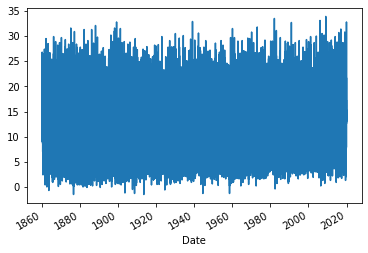

In [24]:
T_Adel['Tmin'].plot()

## Convert to xarray and save as netcdf

In [25]:
!ls /g/data/w48/kb6999/Observations/

allAdelaidedata_030420.csv
Daily_T_Aus_5S.nc
Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv
homogenised_glaisher_data_220721.csv
IDCJAC0010_066062_1800.zip
IDCJAC0010_086071_1800.zip
IDCJAC0010_090015_1800.zip
IDCJAC0011_066062_1800.zip
IDCJAC0011_086071_1800.zip
IDCJAC0011_090015_1800.zip
obs_netcdfs_T
O_extreme_indices_2021.07.22.ipynb
O_extreme_indices_functions_test_2021.07.20.ipynb
O_extremes_plots_2021.07.20.ipynb
O_extremes_plots_by_month_2021.07.21.ipynb
O_extremes_plots_combined_2021.07.22.ipynb
O_maps_2021.07.22.ipynb
O_read_in_daily_obs_2021.07.23.ipynb
O_Time_series_2021.07.19.ipynb
O_timeseries_daily_Tmax_stacked.png
O_timeseries_daily_Tmax+Tmin_stacked.png
O_timeseries_daily_Tmin_stacked.png
O_timeseries_monthly_DTR+ETR_stacked.png
O_timeseries_monthly_DTR_stacked.png
O_timeseries_monthly_ETR_stacked.png
O_timeseries_monthly_FD_stacked.png
O_timeseries_monthly_FD+SU_stacked.png
O_timeseries_monthly_ID_stacked.png
O_timeseries_monthly_SU_stacked.png
O_timeserie

In [26]:
# define path to save netcdfs of daily obs
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [27]:
# Function that converts df to xarray and saves as netcdf
def to_xr_netcdf(df, station):
    df_to_xr = df.to_xarray()
    df_to_xr.to_netcdf(f'{path}{station}.nc')
    return

In [28]:
# call above function to save df for each station as a netcdf
to_xr_netcdf(T_Adel, 'Adelaide (030420)')
to_xr_netcdf(T_COtway, 'Cape Otway (090015)')
to_xr_netcdf(T_Ever, 'Armidale (Eversleigh)')
to_xr_netcdf(T_Melb, 'Melbourne (086071)')
to_xr_netcdf(T_Syd, 'Sydney (066062)')

In [30]:
d_ad = xr.open_dataset(f'{path}/{stations[0]}')
d_ar = xr.open_dataset(f'{path}/{stations[1]}')
d_c = xr.open_dataset(f'{path}/{stations[2]}')
d_m = xr.open_dataset(f'{path}/{stations[3]}')
d_s = xr.open_dataset(f'{path}/{stations[4]}')

NameError: name 'stations' is not defined

In [31]:
start_date = '1878-01-01'
end_date = '1920-12-31'

In [32]:
sorted(os.listdir(path))

['.ipynb_checkpoints',
 'Adelaide (030420).nc',
 'Armidale (Eversleigh).nc',
 'Cape Otway (090015).nc',
 'Melbourne (086071).nc',
 'Sydney (066062).nc']

In [33]:
# remove weird files in the directory using [2:]
stations = sorted(os.listdir(path))[1:]
ds = []
station = []
for s in stations:
    d = xr.open_dataset(f'{path}/{s}')
    #chekc if dataset has Tmin and if not, add Tmin dimension
    if hasattr(d, 'Tmin'):
        print(s,'has Tmin')
    else:
        print(s,'does NOT have Tmin, so assign Tmin=NaN')
        d['Tmin'] = d.Tmax*np.NaN
    d = d.sel(Date=slice(f'{start_date}',f'{end_date}'))
    ds.append(d)
    station.append(s[:-3])

Adelaide (030420).nc has Tmin
Armidale (Eversleigh).nc has Tmin
Cape Otway (090015).nc has Tmin
Melbourne (086071).nc has Tmin
Sydney (066062).nc has Tmin


# issues with new adelaide data 

In [34]:
# concatenate all the stations into one xarray
obs = xr.concat(ds, dim='station', coords = 'minimal', compat='override')
obs.coords['station'] = station
# rename Date coord to time 
obs = obs.rename({'Date':'time'})
obs

ValueError: cannot reindex or align along dimension 'Date' because the index has duplicate values

In [ ]:
# save the xarray of daily aus Tmin and Tmax from start date to end date from 5 stations as a netcdf 
obs.to_netcdf(f'{path}Daily_T_Aus_5S.nc')

In [ ]:
# check it plots right
obs.sel(station='Armidale (Eversleigh)').Tmin.plot()

In [ ]:
# check it reads in properly
xr.open_dataset(f'{path}/Daily_T_Aus_5S.nc')

## Date range
latest start date is 1887 so I propose starting at Jan 1878. 

earliest end date is 1922 at Eversleigh, so for now finish at 1920?? or else 1900 or 1888

In [ ]:
print(f"Adelaide: {T_Adel['Date'][0]} to {T_Adel['Date'].iloc[-1]}")
print(f"Cape Otway: {T_COtway['Date'][0]} to {T_COtway['Date'].iloc[-1]}")
print(f"Eversleigh: {T_Ever['Date'][0]} to {T_Ever['Date'].iloc[-1]}")
print(f"Melbourne: {T_Melb['Date'][0]} to {T_Melb['Date'].iloc[-1]}")
print(f"Sydney: {T_Syd['Date'][0]} to {T_Syd['Date'].iloc[-1]}")

In [ ]:
# select out date range
start_date = '1878-01-01'
end_date = '1920-12-31'
T_Adel_date = T_Adel.loc[start_date: end_date]
T_COtway_date = T_COtway.loc[start_date: end_date]
T_Ever_date = T_Ever.loc[start_date: end_date]
T_Melb_date = T_Melb.loc[start_date: end_date]
T_Syd_date = T_Syd.loc[start_date: end_date]